<img src="./Disaster.PNG" alt="DISASTER LOGO" />

# Natural Language Processing with Disaster Tweets

## Project 🚧

Welcome to one of our "Getting Started" competitions 👋
This particular challenge is perfect for data scientists looking to get started with Natural Language Processing. The competition dataset is not too big, and even if you don’t have much personal computing power, you can do all of the work in our free, no-setup, Jupyter Notebooks environment called Kaggle Notebooks.

## Projects's Description 📇

Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

But, it’s not always clear whether a person’s words are actually announcing a disaster. Take this example:

<img src="./Disaster2.PNG" alt="DISASTER LOGO" />

The author explicitly uses the word “ABLAZE” "en llamas/ ardiendo" but means it metaphorically. This is clear to a human right away, especially with the visual aid. But it’s less clear to a machine.

In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified. If this is your first time working on an NLP problem, we've created a quick tutorial to get you up and running.

Disclaimer: The dataset for this competition contains text that may be considered profane, vulgar, or offensive.


## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning / deep learning
- Part 2 : train a **Word Embeding** 
- Part 3 : **Text Classification**
- Part 4 : **Encoder Decoder**
- Part 5 : **Attention**

## Submission File 🖼️

<img src="./Disaster3.PNG" alt="DISASTER LOGO" />

For each ID in the test set, you must predict 1 if the tweet is describing a real disaster, and 0 otherwise. The file should contain a header and have the following format:. 🤓

# Embedding for Sentiment Analysis

## Data Preprocessing

### Import Data 

In [125]:
# Import Tensorflow & Pathlib librairies
import pandas as pd
import numpy as np
import tensorflow as tf 
import os
import io
import spacy
import warnings
warnings.filterwarnings('ignore')

### Load Train and Test Datasets

In [126]:
train_df = pd.read_csv('train.csv')
display(train_df.head(2))
display(train_df.shape)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1


(7613, 5)

In [127]:
train_df = train_df[['text', 'target']]
display(train_df.head())
display(type(train_df))

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


pandas.core.frame.DataFrame

In [128]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [129]:
test_df = test_df[['text']]
display(test_df.head())
display(type(test_df))

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


pandas.core.frame.DataFrame

In [130]:
# Install spacy package for english langage
!python -m spacy download en_core_web_sm -q

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-01-23 12:22:15.248012: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-01-23 12:22:15.248748: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [131]:
# Import English using en_core_web_sm.load()
import en_core_web_sm
nlp = en_core_web_sm.load()

In [132]:
# Import english stop words
from spacy.lang.en.stop_words import STOP_WORDS
type(STOP_WORDS)

set

### PREPROCESSING

In [133]:
import re

In [134]:
def tweets_filter(tamiz):
    tamiz = re.sub('#bitcoin', 'bitcoin', tamiz)
    tamiz = re.sub('#Bitcoin', 'Bitcoin', tamiz)
    tamiz = re.sub('#[A-Za-z0-9]+', '', tamiz)
    tamiz = re.sub(r'@[A-Za-z0-9]+', '', tamiz)
    tamiz = re.sub('\\n', '', tamiz)
    tamiz = re.sub('https?:\/\/\S+', '', tamiz)
    tamiz = re.sub(r'RT[\s]+', '', tamiz)
    tamiz = re.sub(r':[\s]+', '', tamiz)
    tamiz = re.sub('[^A-Za-z0-9]+', ' ', tamiz)
    tamiz = tamiz.lower()
    return tamiz

In [135]:
train_df['Clean_Tweets'] = train_df['text'].apply(tweets_filter)
train_df.head()

,text,target,Clean_Tweets
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this may allah for...
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",1,13 000 people receive evacuation orders in cal...
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby as smoke fr...


In [136]:
test_df['Clean_Tweets'] = test_df['text'].apply(tweets_filter)
test_df.head()

,text,Clean_Tweets
0,Just happened a terrible car crash,just happened a terrible car crash
1,"Heard about #earthquake is different cities, s...",heard about is different cities stay safe ever...
2,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are ...
3,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills 28 in china and taiwan


### Tokenize

In [137]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [138]:
# fit tokenizer on training set
tokens = tokenizer.fit_on_texts(train_df["Clean_Tweets"]) 
# in this step the tokenizer will list all unique tokens in the text and associate them with a specific integer.
print(tokens)

None


In [139]:
# Text to Sequences
train_df["text_encoded"] = tokenizer.texts_to_sequences(train_df["Clean_Tweets"])
test_df["text_encoded"] = tokenizer.texts_to_sequences(test_df["Clean_Tweets"])
display(train_df.head())
display(test_df.head())

,text,target,Clean_Tweets,text_encoded
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this may allah for...,"[107, 4197, 23, 1, 849, 5, 20, 132, 2694, 4198..."
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[216, 46, 205, 788, 6166, 6167, 1648]"
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[40, 1649, 1524, 4, 1816, 3, 653, 23, 126, 616..."
3,"13,000 people receive #wildfires evacuation or...",1,13 000 people receive evacuation orders in cal...,"[752, 2695, 59, 4199, 240, 1320, 3, 105]"
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby as smoke fr...,"[31, 93, 1152, 20, 789, 21, 6169, 28, 258, 21,..."


,text,Clean_Tweets,text_encoded
0,Just happened a terrible car crash,just happened a terrible car crash,"[31, 893, 2, 1835, 118, 121]"
1,"Heard about #earthquake is different cities, s...",heard about is different cities stay safe ever...,"[439, 55, 9, 1216, 2459, 589, 1939, 202]"
2,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are ...,"[65, 9, 2, 216, 46, 17, 778, 3256, 23, 4661, 8..."
3,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting,"[586, 3586]"
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills 28 in china and taiwan,"[231, 699, 411, 2378, 3, 379, 7, 1305]"


In [140]:
# create new variable with len of sequences to see if there is some with len = 0 & delete them
train_df["len_text"] = train_df["text_encoded"].apply(lambda x: len(x))
train_df[train_df["len_text"] ==0]

,text,target,Clean_Tweets,text_encoded,len_text


In [141]:
# same on test
test_df["len_text"] = test_df["text_encoded"].apply(lambda x: len(x))
test_df = test_df[test_df["len_text"]!=0]
test_df[test_df["len_text"] ==0]

,text,Clean_Tweets,text_encoded,len_text


In [142]:
# Pad sequences
train_pad = tf.keras.preprocessing.sequence.pad_sequences(train_df["text_encoded"], padding="post")
test_pad = tf.keras.preprocessing.sequence.pad_sequences(test_df["text_encoded"], padding="post")
print ("Pad sequence : ", train_pad[0])
print()
print("Shape of pad sequences :", train_pad.shape)

Pad sequence :  [ 107 4197   23    1  849    5   20  132 2694 4198   87   40    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]

Shape of pad sequences : (7613, 34)


In [ ]:
# Size of vocabulary
vocab_size = len(tokenizer.index_word)
print(tokenizer.index_word)
print('Size of vocabulary:', vocab_size)

### MODELLING

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
# Split train set on train & val set
X_train, X_val, y_train, y_val, = train_test_split(train_pad, train_df["target"], test_size=0.2, random_state=42)
print("Training data shape: ", X_train.shape)
print("Validation data shape: ", X_val.shape)

Training data shape:  (6090, 34)
Validation data shape:  (1523, 34)


In [152]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM
from tensorflow.keras import Sequential

In [153]:
embedding_dim=25 # the dimensionality of the representation space

# create sequential model of GRU
model = Sequential([
  Embedding(vocab_size+1, embedding_dim, name="embedding"), # the embedding layer
  # the input dim needs to be equal to the size of the vocabulary + 1 (because of
  # the zero padding)
  GRU(units=64, return_sequences=True), # maintains the sequential nature
  GRU(units=32, return_sequences=False), # returns the last output
  Dense(16, activation='relu'), # a dense layer
  Dense(1, activation='sigmoid') # the prediction layer
])

model.compile(optimizer= tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=tf.keras.metrics.BinaryAccuracy()
              )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 25)          359425    
                                                                 
 gru (GRU)                   (None, None, 64)          17472     
                                                                 
 gru_1 (GRU)                 (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 386,850
Trainable params: 386,850
Non-trainable params: 0
_________________________________________________________________


### TRAINING MODEL

In [158]:
history = model.fit(x=X_train, y=y_train,
          epochs=20, 
          validation_data=(X_val,y_val))

# To save the model
model.save("GRUtweets_model.h5")

Epoch 1/20
191/191 [==============================] - 7s 35ms/step - loss: 0.0254 - binary_accuracy: 0.9849 - val_loss: 1.7800 - val_binary_accuracy: 0.7433
Epoch 2/20
191/191 [==============================] - 7s 34ms/step - loss: 0.0245 - binary_accuracy: 0.9849 - val_loss: 1.9959 - val_binary_accuracy: 0.7315
Epoch 3/20
191/191 [==============================] - 7s 34ms/step - loss: 0.0253 - binary_accuracy: 0.9852 - val_loss: 2.0584 - val_binary_accuracy: 0.7420
Epoch 4/20
191/191 [==============================] - 7s 35ms/step - loss: 0.0261 - binary_accuracy: 0.9851 - val_loss: 1.6477 - val_binary_accuracy: 0.7400
Epoch 5/20
191/191 [==============================] - 7s 34ms/step - loss: 0.0246 - binary_accuracy: 0.9854 - val_loss: 1.9237 - val_binary_accuracy: 0.7269
Epoch 6/20
191/191 [==============================] - 7s 34ms/step - loss: 0.0245 - binary_accuracy: 0.9865 - val_loss: 2.0527 - val_binary_accuracy: 0.7347
Epoch 7/20
191/191 [==============================] - 6s 3

In [159]:
train_score = model.evaluate(X_val, y_val)

48/48 [==============================] - 0s 7ms/step - loss: 1.4722 - binary_accuracy: 0.7511


In [160]:
import matplotlib.pyplot as plt

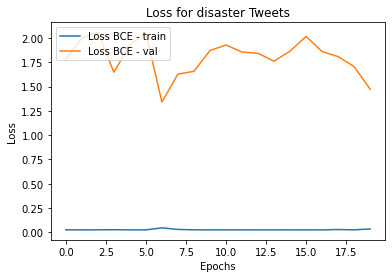

In [161]:
# Plot history: Binary Cross-entropy
plt.plot(history.history['loss'], label='Loss BCE - train')
plt.plot(history.history['val_loss'], label='Loss BCE - val')
plt.title('Loss for disaster Tweets')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper left")

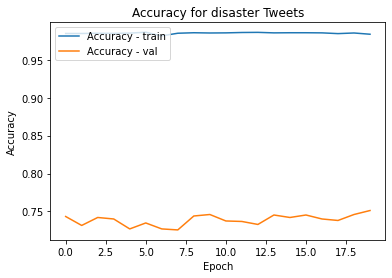

In [162]:
# Plot history: Accuracy
plt.plot(history.history['binary_accuracy'], label='Accuracy - train')
plt.plot(history.history['val_binary_accuracy'], label='Accuracy - val')
plt.title('Accuracy for disaster Tweets')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")

### RESULTS

In [163]:
test_tweet = test_df.loc[:, test_df.columns =='text'].values.flatten()

In [167]:
results = {'text':test_tweet, 'target': (list(map((lambda x : 1 if x >0.5 else 0), model.predict(test_pad))))}
df_results = pd.DataFrame(results)
df_results.head(50)

,text,target
0,Just happened a terrible car crash,1
1,"Heard about #earthquake is different cities, s...",0
2,"there is a forest fire at spot pond, geese are...",1
3,Apocalypse lighting. #Spokane #wildfires,0
4,Typhoon Soudelor kills 28 in China and Taiwan,1
5,We're shaking...It's an earthquake,1
6,They'd probably still show more life than Arse...,0
7,Hey! How are you?,0
8,What a nice hat?,0
9,Fuck off!,0
